In [480]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import spotipy.util as util
import statistics
import networkx as nx
from pyvis.network import Network as net

In [316]:
df = pd.read_csv('./data/2021.01.19 spotify_us_all_fe.csv')
df = df[df['No. of Artists'] > 1]
df = df[list(df.columns[1:11]) + ['Song_days_onchart', 'Profit']]
df.head()

,Date,Track Name,Streams,Position,Artist Name,Artist No.,No. of Artists,Artist Genre,Track URI,Country,Song_days_onchart,Profit
0,2017-01-01,Lighthouse - Andrelli Remix,149929.0,183.0,Hearts & Colors,1,2,['viral pop'],04CttTezSnv71USiiG9mIo,United States,1,496.26499
1,2017-01-01,Lighthouse - Andrelli Remix,149929.0,183.0,Andrelli,2,2,['swedish pop'],04CttTezSnv71USiiG9mIo,United States,1,496.26499
2,2017-01-01,In the Name of Love,435945.0,27.0,Martin Garrix,1,2,"['big room', 'dance pop', 'edm', 'electro hous...",04DwTuZ2VBdJCCC5TROn7L,United States,1,1442.97795
3,2017-01-01,In the Name of Love,435945.0,27.0,Bebe Rexha,2,2,"['dance pop', 'electropop', 'pop', 'pop dance'...",04DwTuZ2VBdJCCC5TROn7L,United States,1,1442.97795
4,2017-01-01,Party,151474.0,178.0,Chris Brown,1,3,"['dance pop', 'pop', 'pop rap', 'r&b', 'rap']",05Z7jet4VDNVgNQWcYHnrk,United States,1,501.37894


Text(0.5, 1.0, 'Days on the Chart Compared to the Position')

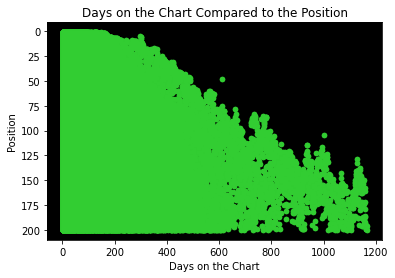

In [29]:
ax1 = (
    df.plot.scatter(x="Song_days_onchart", y="Position", color='limegreen')   
)

ax1.invert_yaxis()
ax1.set_facecolor('black')
ax1.set_xlabel("Days on the Chart")
ax1.set_ylabel("Position")
ax1.set_title("Days on the Chart Compared to the Position")

Text(0.5, 1.0, 'Days on the Chart Compared to the No. of Streams')

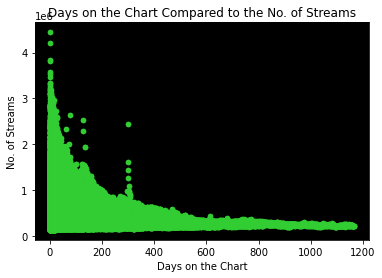

In [48]:
ax2 = (
    df.plot.scatter(x="Song_days_onchart", y="Streams", color='limegreen')   
)

ax2.set_facecolor('black')
ax2.set_xlabel("Days on the Chart")
ax2.set_ylabel("No. of Streams")
ax2.set_title("Days on the Chart Compared to the No. of Streams")

Text(0.5, 1.0, 'Days on the Chart Compared to the No. of Streams')

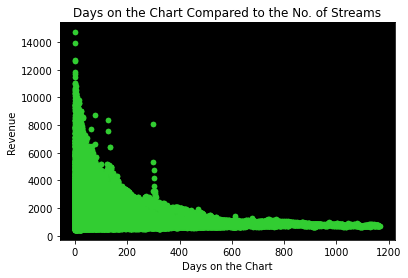

In [53]:
ax3 = (
    df.plot.scatter(x="Song_days_onchart", y="Profit", color='limegreen')   
)

ax3.set_facecolor('black')
ax3.set_xlabel("Days on the Chart")
ax3.set_ylabel("Revenue")
ax3.set_title("Days on the Chart Compared to the No. of Streams")

In [59]:
cumul_df = df.groupby(['Track URI'])[['Profit']].sum().reset_index(drop=False)
cumul_df['Total No. of Days'] = test['Track URI'].apply(lambda x: len(df[df['Track URI']==x]))
cumul_df

,Track URI,Profit,Total No. of Days
0,000xQL6tZNLJzIrtIgxqSl,138898.11918,136
1,003VDDA7J3Xb2ZFlNx7nIZ,18229.61316,14
2,00B7TZ0Xawar6NZ00JFomN,94879.32950,70
3,00BuKLSAFkaEkaVAgIMbeA,1389.30630,2
4,00ETaeHUQ6lops3oWU1Wrt,2259.06176,2
...,...,...,...
2933,7zLGHiDWd9T1Rxw4PQCb13,7039.18502,2
2934,7zLMYtNJcabv4h4wBnjNQI,17734.02672,14
2935,7zOoHxDt1duHL8czY7o7ab,1592.42776,2
2936,7zVCrzzEJU7u24sbJPXA5W,613638.88090,756


Text(0.5, 1.0, 'Days on the Chart Compared to the Revenue')

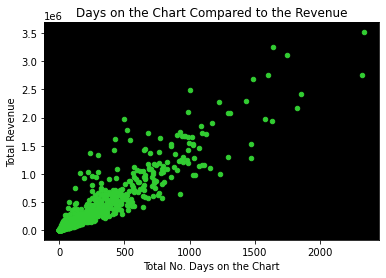

In [60]:
ax4 = (
    cumul_df.plot.scatter(x="Total No. of Days", y="Profit", color='limegreen')   
)

ax4.set_facecolor('black')
ax4.set_xlabel("Total No. Days on the Chart")
ax4.set_ylabel("Total Revenue")
ax4.set_title("Days on the Chart Compared to the Revenue")

In [317]:
df['Sub-genres'] = df['Artist Genre']
df['Sub-genres'] = df['Sub-genres'].apply(lambda x: x.replace('[', ''))
df['Sub-genres'] = df['Sub-genres'].apply(lambda x: x.replace(']', ''))
df['Sub-genres'] = df['Sub-genres'].apply(lambda x: x.replace("'", ''))
df['Sub-genres'] = df['Sub-genres'].apply(lambda x: x.replace(', ', ' '))
df['Sub-genres'] = df['Sub-genres'].apply(lambda x: x.split(' '))
df['Top Sub-Genres'] = df['Sub-genres'].apply(lambda x: statistics.multimode(x))

In [479]:
genres = {'latin':'latin',
              'reggaeton': 'latin',
              'latino': 'latin',
              'ritmo': 'latin',
              'salsa': 'latin',
              'mexican': 'latin',
              'alternative': 'indie & alternative',
              'indie': 'indie & alternative',
              'experimental': 'indie & alternative',
              'atl': 'indie & alternative',
              'rock': 'rock & metal',
              'metal': 'rock & metal',
              'punk': 'rock & metal',
              'pop':'pop', 
              'blues':'blues & rhythm',
              'funk': 'blues & rhythm',
              'funky': 'blues & rhythm',
              'jazz': 'jazz',
              'country': 'country', 
              'folk':'folk', 
              'classical':'classical',
              'hip': 'hip hop & rap',
              'hop': 'hip hop & rap',
              'rap': 'hip hop & rap',
              'trap': 'hip hop & rap',
              'drill': 'hip hop & rap',
              'gospel': 'christian & gospel',
              'christian': 'christian & gospel',
              'dance': 'electronic, house & dance',
              'edm' : 'electronic, house & dance',
              'electronic': 'electronic, house & dance',
              'electropop': 'electronic, house & dance',
              'melbourne': 'electronic, house & dance',
              'bounce': 'electronic, house & dance',
              'house': 'electronic, house & dance',
              'grime': 'electronic, house & dance',
              'electro': 'electronic, house & dance',
              'electronica': 'electronic, house & dance',
              'trance': 'electronic, house & dance',
              'r&b': 'r&b & soul',
              'soul': 'r&b & soul',
              'soundtrack': 'soundtrack',
              'hollywood': 'soundtrack',
              'show': 'broadway',
              'tunes': 'broadway',
              'broadway': 'broadway',
              'disney': 'broadway',
              'k-pop': 'k-pop',
              'reggae': 'reggae'
         }

print('No. of Genres', len(set(genres.values())))

def pick_genre(sub_genres, genres=genres):
    
    if sub_genres == ['']:
        return 'Unknown'
    
    for element in sub_genres:
        if element in list(genres.keys()):
            return genres[element]
        
    return 'Other'
        

No. of Genres 17


In [485]:
df['Genre'] = df['Top Sub-Genres'].apply(pick_genre)
df['Year'] = df['Date'].apply(lambda x: int(x[0:4]))
df.head()

,Date,Track Name,Streams,Position,Artist Name,Artist No.,No. of Artists,Artist Genre,Track URI,Country,Song_days_onchart,Profit,Sub-genres,Top Sub-Genres,Genre,Year
0,2017-01-01,Lighthouse - Andrelli Remix,149929.0,183.0,Hearts & Colors,1,2,['viral pop'],04CttTezSnv71USiiG9mIo,United States,1,496.26499,"[viral, pop]","[viral, pop]",pop,2017
1,2017-01-01,Lighthouse - Andrelli Remix,149929.0,183.0,Andrelli,2,2,['swedish pop'],04CttTezSnv71USiiG9mIo,United States,1,496.26499,"[swedish, pop]","[swedish, pop]",pop,2017
2,2017-01-01,In the Name of Love,435945.0,27.0,Martin Garrix,1,2,"['big room', 'dance pop', 'edm', 'electro hous...",04DwTuZ2VBdJCCC5TROn7L,United States,1,1442.97795,"[big, room, dance, pop, edm, electro, house, p...","[pop, house]",pop,2017
3,2017-01-01,In the Name of Love,435945.0,27.0,Bebe Rexha,2,2,"['dance pop', 'electropop', 'pop', 'pop dance'...",04DwTuZ2VBdJCCC5TROn7L,United States,1,1442.97795,"[dance, pop, electropop, pop, pop, dance, post...",[pop],pop,2017
4,2017-01-01,Party,151474.0,178.0,Chris Brown,1,3,"['dance pop', 'pop', 'pop rap', 'r&b', 'rap']",05Z7jet4VDNVgNQWcYHnrk,United States,1,501.37894,"[dance, pop, pop, pop, rap, r&b, rap]",[pop],pop,2017


In [541]:
reduced_df = df[['Artist Name', 'Track URI', 'Genre', 'Year']].drop_duplicates(ignore_index=True)
reduced_df

,Artist Name,Track URI,Genre,Year
0,Hearts & Colors,04CttTezSnv71USiiG9mIo,pop,2017
1,Andrelli,04CttTezSnv71USiiG9mIo,pop,2017
2,Martin Garrix,04DwTuZ2VBdJCCC5TROn7L,pop,2017
3,Bebe Rexha,04DwTuZ2VBdJCCC5TROn7L,pop,2017
4,Chris Brown,05Z7jet4VDNVgNQWcYHnrk,pop,2017
...,...,...,...,...
8053,Future,5uYqmEN6TAAE8ss8YmprNV,hip hop & rap,2020
8054,Playboi Carti,7zLMYtNJcabv4h4wBnjNQI,indie & alternative,2020
8055,Kid Cudi,7zLMYtNJcabv4h4wBnjNQI,hip hop & rap,2020
8056,Popp Hunna,7s95nPLMfiLTPoQ7pqUFmO,Unknown,2020


In [543]:
track_genre = {}
turi_list = list(reduced_df['Track URI'])
g_list = list(reduced_df['Genre'])

for i in range(len(reduced_df)):
    
    uri = turi_list[i]
    genre = g_list[i]
    
    if uri in track_genre:
        track_genre[uri].append(genre)
    else:
        track_genre[uri] = [genre]

track_genre

{'04CttTezSnv71USiiG9mIo': ['pop', 'pop'],
 '04DwTuZ2VBdJCCC5TROn7L': ['pop', 'pop'],
 '05Z7jet4VDNVgNQWcYHnrk': ['pop', 'hip hop & rap', 'hip hop & rap'],
 '0B8B8cVRFIG1yznoQe7c9s': ['pop', 'electronic, house & dance'],
 '0BU7nIcCZxYSE0hYcc5oZz': ['hip hop & rap', 'hip hop & rap'],
 '0H8XeaJunhvpBdBFIYi6Sh': ['hip hop & rap', 'pop', 'hip hop & rap', 'pop'],
 '0L7loeTIg6akW84aEQZpCT': ['pop', 'Unknown', 'electronic, house & dance'],
 '0QsvXIfqM0zZoerQfsI9lm': ['pop', 'pop', 'pop', 'pop'],
 '0azC730Exh71aQlOt9Zj3y': ['electronic, house & dance', 'pop'],
 '0q5DrtpnnGpOvBy5nnPMbe': ['hip hop & rap', 'Unknown'],
 '0v9Wz8o0BT8DU38R4ddjeH': ['hip hop & rap',
  'hip hop & rap',
  'hip hop & rap',
  'hip hop & rap',
  'hip hop & rap',
  'hip hop & rap'],
 '11KJSRSgaDxqydKYiD2Jew': ['hip hop & rap', 'pop'],
 '12REd1n8PeiHHWOh066tpr': ['Other', 'Unknown'],
 '14WWzenpaEgQZlqPq2nk4v': ['pop', 'hip hop & rap'],
 '17Fd6Yb7mSbinKG8LoWfFl': ['pop', 'pop'],
 '1Bqxj0aH5KewYHKUg1IdrF': ['hip hop & rap', 

In [ ]:
def generate_network(year=None, data):
    
    if year !=None:
        data_by_year = data[data.Year == year]
    else:
        data_by_year = data
    
    #Create Nodes
    nodes_df = data_by_year.groupby(['Genre'])[['Artist Name']].count().reset_index(drop=False)
    nodes_df['Size'] = nodes_df['Count'].apply(lambda x: 100*x**(1/2))
    
    #Create Edges
    
    g = nx.DiGraph()
    for i in range(len(nodes_df)):
        g.add_node(nodes_df.Genre[i], title=nodes_df.Genre[i], size=nodes_df.Size[i], color='#93c47d')
    
    collab_g = Network(height='600px', width='900px', heading='Genre-to-Genre Collaborations', notebook=True)
    collab_g.barnes_hut(overlap=1)
    collab_g.toggle_drag_nodes(True)
    collab_g.from_nx(g)
    collab_g.show(f'artist_collab_{year}.html')
    
    node_df = pd.DataFrame({})

In [467]:
test1 = df[df['Genre']=='Other']
test2 = df[df['Genre']!='Other']
print(len(test1))
print(len(test2))

3078
280675


In [468]:
y = []
test1['Top Sub-Genres'].apply(lambda x: y.extend(x))
set(y)

{'"childrens',
 'abstract',
 'adult',
 'african',
 'afro',
 'american',
 'australian',
 'bass',
 'basshall',
 'beatlesque',
 'beats',
 'big',
 'british',
 'canadian',
 'canaria',
 'cartoon',
 'chamber',
 'chillwave',
 'chinese',
 'choir',
 'choir"',
 'comedy',
 'dancehall',
 'deep',
 'dubstep',
 'easy',
 'epicore',
 'escape',
 'francoton',
 'future',
 'game',
 'glitchcore',
 'gqom',
 'group',
 'guadeloupe',
 'halloween',
 'harmony',
 'hyperpop',
 'k-rap',
 'light',
 'listening',
 'lounge',
 'madchester',
 'metalcore',
 'motown',
 'music',
 'music"',
 'musica',
 'musique',
 'nigerian',
 'ninja',
 'novelty',
 'psych',
 'room',
 'scandipop',
 'singer-songwriter',
 'smooth',
 'south',
 'standards',
 'swedish',
 'uk',
 'vapor',
 'video',
 'vocal',
 'zimdancehall'}